In [48]:
# By Ismael Valenzuela (@aboutsecurity / @thinkredactblue)

# Data Science in VS Code Tutorial - https://code.visualstudio.com/docs/datascience/data-science-tutorial 

# This tutorial demonstrates using Visual Studio Code and the Microsoft Python extension with common data science libraries to explore a basic data science scenario. Specifically, using passenger data from the Titanic, you will learn how to set up a data science environment, import and clean data, create visualizations and seeing relationships between data.

# This tutorial uses the Titanic dataset available on OpenML.org, which is obtained from Vanderbilt University's Department of Biostatistics at https://hbiostat.org/data. The Titanic data provides information about the survival of passengers on the Titanic and characteristics about the passengers such as age and ticket class.

# To begin, download the Titanic data from https://www.openml.org/d/40945 as a CSV file (download links in the upper right) named data.csv and save it to your current working folder.


In [49]:
# Begin by importing the pandas and numpy libraries, two common libraries used for manipulating data, and loading the Titanic data into a pandas DataFrame. A Pandas DataFrame is simply a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [51]:
# View the data that was loaded using the Variables Explorer and Data Viewer. First select the Variables icon in the notebook's upper toolbar.

# Use the Data Viewer to view, sort, and filter the rows of data. After reviewing the data, it can then be helpful to graph some aspects of it to help visualize the relationships between the different variables.

# Before the data can be graphed, you need to make sure that there aren't any issues with it. If you look at the Titanic csv file, one thing you'll notice is that a question mark ("?") was used to identify cells where data wasn't available.

In [52]:
# Variable	Definition	Key
# Survived	Survival	0 = No, 1 = Yes
# Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# Sex	Sex
# Age	Age in years
# Sibsp	nr. of siblings / spouses aboard the Titanic
# Parch	nr. of parents / children aboard the Titanic
# Ticket	Ticket number
# Fare	Passenger fare
# Cabin	Cabin number
# Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown,S = Southampton

In [53]:
# While Pandas can read this value into a DataFrame, the result for a column like age is that its data type will be set to object instead of a numeric data type, which is problematic for graphing. This problem can be corrected by replacing the question mark with a missing value that pandas is able to understand. 

data['age'].dtype

dtype('O')

In [54]:
# Replace the question marks in the age and fare columns with the numpy NaN value. Notice that we also need to update the column's data type after replacing the values.

# NaN stands for Not A Number and is one of the common ways to represent the missing value in the data. It is a special floating-point value and cannot be converted to any other type than float.

data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [55]:
data['age'].dtype

dtype('float64')

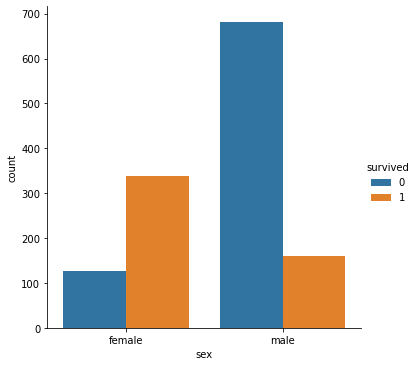

In [56]:
# Now that the data is in good shape, we can use seaborn and matplotlib to view how certain columns of the dataset relate to survivability. The following code will generated the plots using the seaborn and matplot libraries.

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="sex", hue="survived",
kind="count", data=data)


In [57]:
# Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

# But it's also possible to use pandas to calculate correlations. To do so, all the variables used need to be numeric for the correlation calculation and currently gender is stored as a string. To convert those string values to integers, add and run the following code.

data.replace({'male': 1, 'female': 0}, inplace=True)

In [58]:
# Now, we can analyze the correlation between all the input variables to identify the features that would be the best inputs to a machine learning model. The closer a value is to 1, the higher the correlation between the value and the result. Use the following code to correlate the relationship between all variables and survival.

data.corr().abs()[["survived"]]



,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


<AxesSubplot:xlabel='survived', ylabel='fare'>

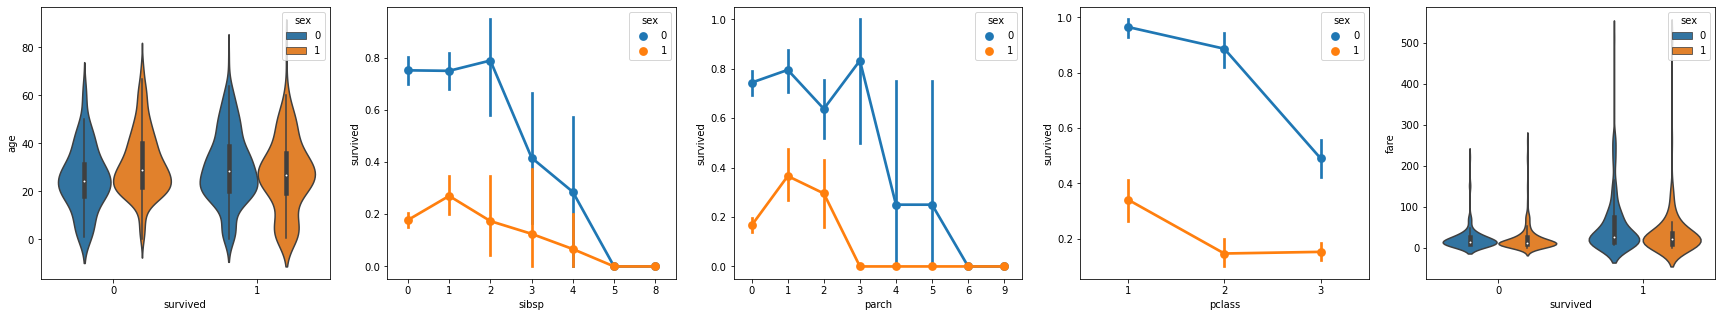

In [60]:

# More visualizations with seaborn, including violinplot and pointplot 

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])